**Project Data Wrangling Kelompok 12**

Nama anggota:

Fawwaz Azri Manshur Prasetya (24031554074)

Meisya Natasafira (24031554174)

**WEB SCRAP 'CARMUDI'**

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
urlcarmudi = 'https://www.carmudi.co.id/mobil-bekas-dijual/indonesia_dki-jakarta?'
page = requests.get(urlcarmudi)
soup = BeautifulSoup(page.text, 'html.parser')

In [ ]:
data = soup.find_all('h2', class_ = "listing__title epsilon flush")
print(len(data))

25


In [ ]:
rootcarmudi = 'https://www.carmudi.co.id/mobil-dijual/indonesia_dki-jakarta?type=used&page_number='

mobil = []
harga = []

for pages in range(1,10):
  html = requests.get(rootcarmudi + str(pages))
  soup = BeautifulSoup(html.text)

  for i in soup.find_all('h2', class_ = "listing__title epsilon flush"):
    mobil.append(i.text)

  for i in soup.find_all('div', class_ ="listing__price"):
    harga.append(i.text)

print(len(harga))

225


In [ ]:
mobil_list = []
for item in mobil:
  mobil_list.append(item.split())

mobil_list

[['2021',
  'Mitsubishi',
  'Xpander',
  'Cross',
  '1.5',
  'MPV',
  '-',
  'HARGA',
  'TERMURAH',
  'MOBIL',
  'BERKUALITAS',
  'GARANSI',
  '1',
  'TAHUN'],
 ['2019',
  'Toyota',
  'Rush',
  '1.5',
  'TRD',
  'Sportivo',
  'SUV',
  '-',
  'GARANSI',
  '1',
  'TAHUN',
  '-',
  'BEBAS',
  'LAKA',
  'DAN',
  'BANJIR',
  '-',
  'C9MC000'],
 ['2020',
  'Nissan',
  'Livina',
  '1.5',
  'VL',
  'MPV',
  '-',
  'PROMO',
  'DISKON',
  'DP',
  'CUMA',
  '5JUTAAN',
  'CICILAN',
  'RINGAN',
  'GARANSI',
  'MESIN',
  'TRANSMISI',
  'AC',
  'SELAMA',
  '1',
  'TAHUN',
  'PLUS',
  'DETAILING',
  'MOBIL'],
 ['2018',
  'Toyota',
  'Sienta',
  '1.5',
  'V',
  'MPV',
  '-',
  'mobil',
  'keluarga',
  'nyaman',
  'siap',
  'pakai',
  'PAJAK',
  'PANJANG',
  'DESEMBER',
  '2026'],
 ['2023', 'BMW', 'M4', '3.0', 'Competition', 'Coupe'],
 ['2023',
  'Hyundai',
  'Creta',
  '1.5',
  'Prime',
  'SUV',
  '-',
  'angsuran',
  '5',
  'jt',
  'an'],
 ['2022',
  'Hyundai',
  'Santa',
  'Fe',
  '2.5',
  'Signature

In [ ]:
tahun_mobil = []
for i in mobil_list:
  for y in i[:1]:
    tahun_mobil.append(y)

mobil_brand = []
for i in mobil_list:
  for y in i[1:2]:
    mobil_brand.append(y)

mobil_merk = []
for i in mobil_list:
  for y in i[2:3]:
    mobil_merk.append(y)

harga_mobil = []
for i in harga:

    cleaned_price_list = i.replace('\n', '').split()

    if 'Rp' in cleaned_price_list:
        cleaned_price_list.remove('Rp')

    harga_mobil.append(" ".join(cleaned_price_list))

In [ ]:
header_tabel = ['Tahun', 'Brand', 'Merk', 'Harga']
print(header_tabel)

['Tahun', 'Brand', 'Merk', 'Harga']


In [ ]:
dfcarmudi = pd.DataFrame(list(zip(tahun_mobil, mobil_brand, mobil_merk, harga_mobil)), columns = header_tabel)
dfcarmudi

,Tahun,Brand,Merk,Harga
0,2021,Mitsubishi,Xpander,-9% 204.000.000
1,2019,Toyota,Rush,193.000.000
2,2020,Nissan,Livina,194.000.000
3,2018,Toyota,Sienta,-9% 155.000.000
4,2023,BMW,M4,2.100.000.000
...,...,...,...,...
220,2014,Toyota,Hilux,320.000.000
221,2022,BMW,X5,1.040.000.000
222,2016,Daihatsu,Ayla,93.000.000
223,2022,Hyundai,Palisade,685.000.000


**CLEANING 'CARMUDI'**

In [ ]:
import re

bersih_hari_jam = r"\d+\s*hari\s*\d+\s*jam"

dfcarmudi = dfcarmudi[~dfcarmudi['Harga'].str.contains(bersih_hari_jam, case=False, na=False)]

def bersihkan_persen(x):
    x = re.sub(r"-?\d+\%", "", str(x))
    x = x.strip()
    return x if x else None

dfcarmudi['Harga'] = dfcarmudi['Harga'].apply(bersihkan_persen)

/tmp/ipython-input-2876732984.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcarmudi['Harga'] = dfcarmudi['Harga'].apply(bersihkan_persen)


In [ ]:
dfcarmudi.to_csv("dataset_mobilbekas_carmudi.csv", index=False)

**WEB SCRAP & CLEANING 'CAROLINE'**

In [ ]:
urlcaroline = 'https://www.caroline.id/beli'
page = requests.get(urlcaroline)
soup = BeautifulSoup(page.text, 'html')

In [ ]:
data = soup.find_all('h2', class_ = 'z-[5] truncate font-roboto font-normal tracking-wide !text-black-600 w-full overflow-hidden text-base ds:text-sm dm:text-base')
print(len(data))

12


In [ ]:
rootcaroline = 'https://www.caroline.id/beli?page='

mobil = []
harga = []

for pages in range(1,10):
  html = requests.get(rootcaroline + str(pages))
  soup = BeautifulSoup(html.text)

  for i in soup.find_all('h2', class_ = "z-[5] truncate font-roboto font-normal tracking-wide !text-black-600 w-full overflow-hidden text-base ds:text-sm dm:text-base"):
    mobil.append(i.text)

  for i in soup.find_all('div', class_ = "mb-7 mt-4 flex items-center justify-between"):
    harga.append(i.text)

print(len(harga))

108


In [ ]:
mobil_list = []
for item in mobil:
  mobil_list.append(item.split())

mobil_list

[['Toyota', 'Fortuner', 'VRZ', '2.4', '2020'],
 ['Mitsubishi', 'Xpander', 'ULTIMATE', '1.5', '2021'],
 ['Toyota', 'Sienta', 'Q', '1.5', '2016'],
 ['Toyota', 'Calya', 'G', 'NEW', '1.2', '2021'],
 ['Daihatsu', 'Sigra', 'M', '1.0', '2024'],
 ['Honda', 'Freed', 'S', '1.5', '2012'],
 ['Daihatsu', 'Terios', 'R', '1.5', '2021'],
 ['Daihatsu', 'Terios', 'R', '1.5', '2019'],
 ['Toyota', 'Corolla', 'ALTIS', 'V', '1.8', '2021'],
 ['Daihatsu', 'Sigra', 'R', '1.2', '2020'],
 ['Daihatsu', 'Sigra', 'R', 'NEW', '1.2', '2021'],
 ['Honda', 'Mobilio', 'E', '1.5', '2019'],
 ['Toyota', 'Innova', 'V', 'DIESEL', '2.4', '2022'],
 ['Toyota', 'Agya', 'G', '1.0', '2016'],
 ['Mazda', 'Cx-5', 'GRAND', 'TOURING', '2.5', '2021'],
 ['Toyota', 'Yaris', 'S', 'TRD', 'HEYKERS', '1.5', '2017'],
 ['Toyota', 'Avanza', 'G', 'NEW', '1.5', '2023'],
 ['Daihatsu', 'Xenia', 'M', 'STANDAR', '1.0', '2016'],
 ['Suzuki', 'Xl7', 'ZETA', '1.5', '2022'],
 ['Suzuki', 'Baleno', 'HATCHBACK', '1.4', '2019'],
 ['Toyota', 'Innova', 'Q', 'VENT

In [ ]:
tahun = []
for i in mobil_list:
  for y in i[-1:]:
    tahun.append(y)

mobil_brand = []
for i in mobil_list:
  for y in i[:1]:
    mobil_brand.append(y)

mobil_merk = []
for i in mobil_list:
  for y in i[1:2]:
    mobil_merk.append(y)

harga_mobil = []
for i in harga:
    cleaned_price_list = i.replace('Rp', '').split()
    harga_mobil.append(" ".join(cleaned_price_list))

In [ ]:
dfcaroline = pd.DataFrame({'Tahun':tahun, 'Merk':mobil_brand, 'Mobil':mobil_merk, 'Harga':harga_mobil})
dfcaroline

,Tahun,Merk,Mobil,Harga
0,2020,Toyota,Fortuner,377.000.000
1,2021,Mitsubishi,Xpander,209.000.000
2,2016,Toyota,Sienta,163.000.000
3,2021,Toyota,Calya,119.000.000
4,2024,Daihatsu,Sigra,113.000.000
...,...,...,...,...
103,2022,Toyota,Innova,448.000.000
104,2018,Honda,Jazz,211.000.000
105,2022,Mitsubishi,Pajero,445.000.000
106,2019,Toyota,Alphard,638.000.000


In [ ]:
dfcaroline.to_csv('dataset_mobilbekas_caroline.csv', index=False)

**DATA COLLECTING** FROM SCRAPING

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_carmudi = pd.read_csv("/content/dataset_mobilbekas_carmudi.csv")
dataset_caroline = pd.read_csv("/content/dataset_mobilbekas_caroline.csv")

**DATA INTEGRATION** FROM SCRAPING

In [ ]:
dataset_carmudi = dataset_carmudi.rename(columns={'Merk':'Model'})
dataset_caroline = dataset_caroline.rename(columns={'Merk':'Brand', 'Mobil':'Model'})

In [ ]:
df_web = pd.concat([dataset_carmudi, dataset_caroline], axis=0)
df_web

,Tahun,Brand,Model,Harga
0,2021,Mitsubishi,Xpander,204.000.000
1,2019,Toyota,Rush,193.000.000
2,2020,Nissan,Livina,194.000.000
3,2018,Toyota,Sienta,155.000.000
4,2023,BMW,M4,2.100.000.000
...,...,...,...,...
103,2022,Toyota,Innova,448.000.000
104,2018,Honda,Jazz,211.000.000
105,2022,Mitsubishi,Pajero,445.000.000
106,2019,Toyota,Alphard,638.000.000


In [ ]:
df_web['Harga'] = df_web['Harga'].str.replace('.', '', regex=False)
df_web['Harga'] = df_web['Harga'].str.replace(r'\D', '', regex=True)
df_web['Harga'] = pd.to_numeric(df_web['Harga'], errors='coerce')
df_web.dropna(subset=['Harga'], inplace=True)
df_web['Harga'] = df_web['Harga'].astype(int)

In [ ]:
df_web.describe(include='all')

,Tahun,Brand,Model,Harga
count,330.000000,330,330,3.300000e+02
unique,NaN,17,89,NaN
top,NaN,Toyota,Xpander,NaN
freq,NaN,107,17,NaN
mean,2019.430303,NaN,NaN,2.527379e+08
std,3.065098,NaN,NaN,2.529829e+08
min,2010.000000,NaN,NaN,3.000000e+00
25%,2018.000000,NaN,NaN,1.422500e+08
50%,2020.000000,NaN,NaN,1.850000e+08
75%,2022.000000,NaN,NaN,2.400000e+08


In [ ]:
df_web.isnull().sum()

,0
Tahun,0
Brand,0
Model,0
Harga,0


In [ ]:
df_web.groupby(['Tahun', 'Brand']).describe()

Harga                                          \
                    count         mean           std          min   
Tahun Brand                                                         
2010  Mercedes-Benz   1.0  160000000.0           NaN  160000000.0   
      Toyota          2.0  177500000.0  1.060660e+07  170000000.0   
2011  Nissan          2.0  131000000.0  7.636753e+07   77000000.0   
      Suzuki          1.0   85000000.0           NaN   85000000.0   
      Toyota          1.0   95000000.0           NaN   95000000.0   
...                   ...          ...           ...          ...   
2024  GWM             1.0  835000000.0           NaN  835000000.0   
      Hyundai         1.0  510000000.0           NaN  510000000.0   
      Mitsubishi      2.0  251500000.0  2.121320e+06  250000000.0   
      Toyota          2.0  852500000.0  6.965002e+08  360000000.0   
2025  Denza           1.0  875000000.0           NaN  875000000.0   

                                                                           
                             25%          50%           75%           max  
Tahun Brand                                                                
2010  Mercedes-Benz  160000000.0  160000000.0  1.600000e+08  1.600000e+08  
      Toyota         173750000.0  177500000.0  1.812500e+08  1.850000e+08  
2011  Nissan         104000000.0  131000000.0  1.580000e+08  1.850000e+08  
      Suzuki          85000000.0   85000000.0  8.500000e+07  8.500000e+07  
      Toyota          95000000.0   95000000.0  9.500000e+07  9.500000e+07  
...                          ...          ...           ...           ...  
2024  GWM            835000000.0  835000000.0  8.350000e+08  8.350000e+08  
      Hyundai        510000000.0  510000000.0  5.100000e+08  5.100000e+08  
      Mitsubishi     250750000.0  251500000.0  2.522500e+08  2.530000e+08  
      Toyota         606250000.0  852500000.0  1.098750e+09  1.345000e+09  
2025  Denza          875000000.0  875000000.0  8.750000e+08  8.750000e+08  

[90 rows x 8 columns]

In [ ]:
print(df_web.to_string())

     Tahun          Brand      Model       Harga
0     2021     Mitsubishi    Xpander   204000000
1     2019         Toyota       Rush   193000000
2     2020         Nissan     Livina   194000000
3     2018         Toyota     Sienta   155000000
4     2023            BMW         M4  2100000000
5     2023        Hyundai      Creta   255000000
6     2022        Hyundai      Santa   385000000
7     2019     Mitsubishi    Xpander   193000000
8     2016          Honda       Jazz   185000000
9     2022        Hyundai      Creta   250000000
10    2021          Honda       HR-V   205000000
11    2023          Mazda       CX-5   376000000
12    2022          Honda       CR-V   382000000
13    2018         Toyota      Calya   107000000
14    2022         Toyota      Veloz   210000000
15    2022         Toyota      Veloz   220000000
16    2021         Toyota       Rush   216000000
17    2019         Toyota       Rush   190000000
18    2019         Toyota       Rush   193000000
19    2019          

**VISUALISASI & ANALISIS** FROM SCRAPING

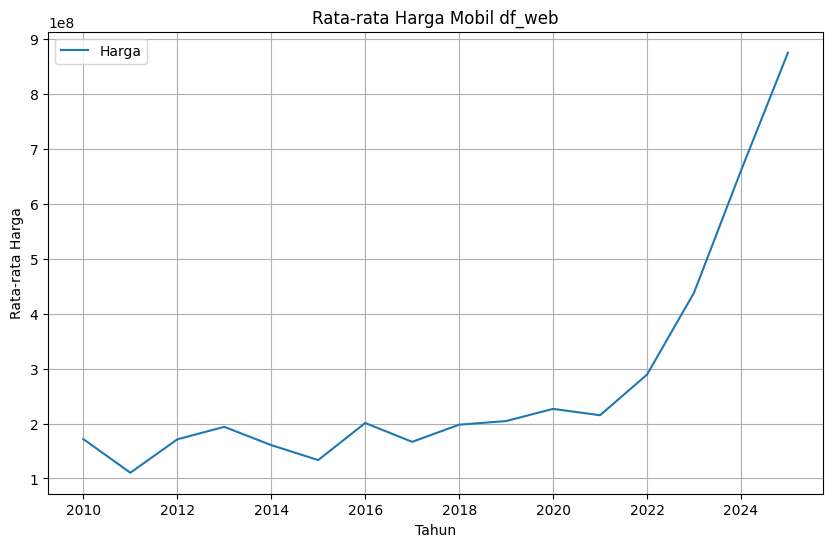

In [ ]:
df_annual_avg_price = df_web.groupby('Tahun')['Harga'].mean().reset_index()

df_annual_avg_price = df_annual_avg_price.sort_values(by='Tahun')

df_annual_avg_price.plot(x='Tahun', y='Harga', kind='line', figsize=(10, 6))
plt.title('Rata-rata Harga Mobil df_web')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga')
plt.grid(True)
plt.show()

Visualisasi diatas merupakan visualisasi dari rata-rata harga pada setiap keluaran tahun pada mobil bekas tersebut, jika kita lihat dan amati visualiasinya, kita bisa lihat saat titik pertama pada mobil keluaran 2000 an memiliki rata-rata harga sekitar 150 juta dan saat semakin keluaran tahun terbaru, rata-rata harga semakin naik yang menandakan mobil bekas dengan keluaran tahun terbaru masih memiliki harga yang tinggi dengan sekitar 300 juta pada mobil keluaran 2020an dan semakin tinggi rata-rata harga mendekati tahun 2025


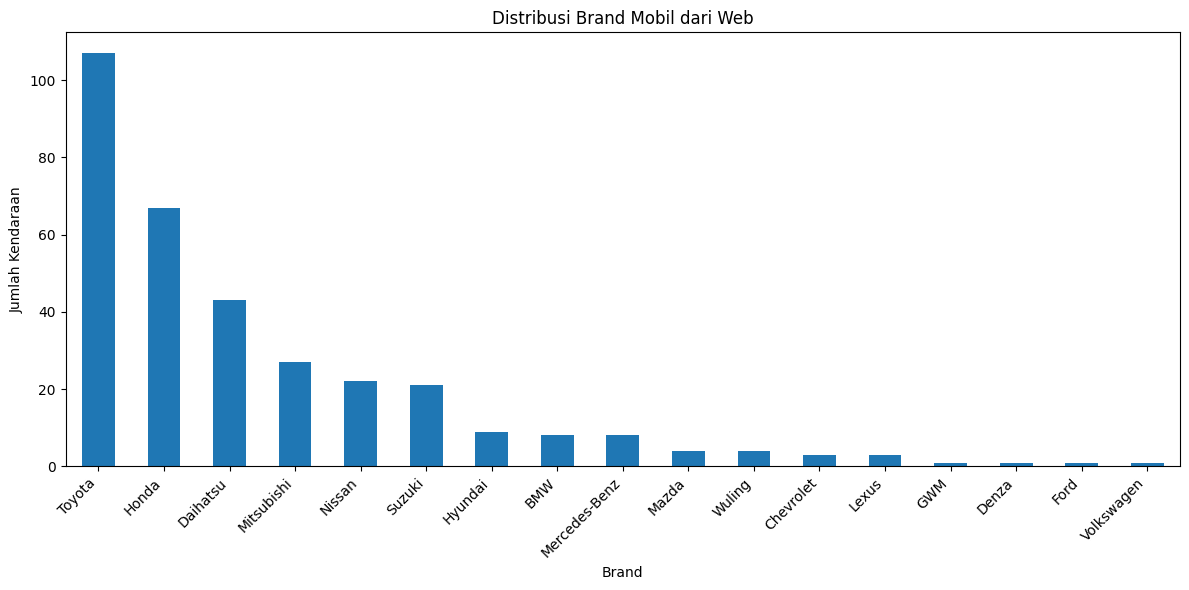

In [ ]:
brand_counts = df_web['Brand'].value_counts()

plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Distribusi Brand Mobil dari Web')
plt.xlabel('Brand')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualisasi berikutnya ialah distribusi merek mobil yang mana Toyota memiliki angka jumlah paling banyak, yang artinya banyak mobil bekas yang beredar adalah merk Toyota dan diteruksannya dengan merk lain yang semakin sedikit munculnya penjualan mobil tersebut

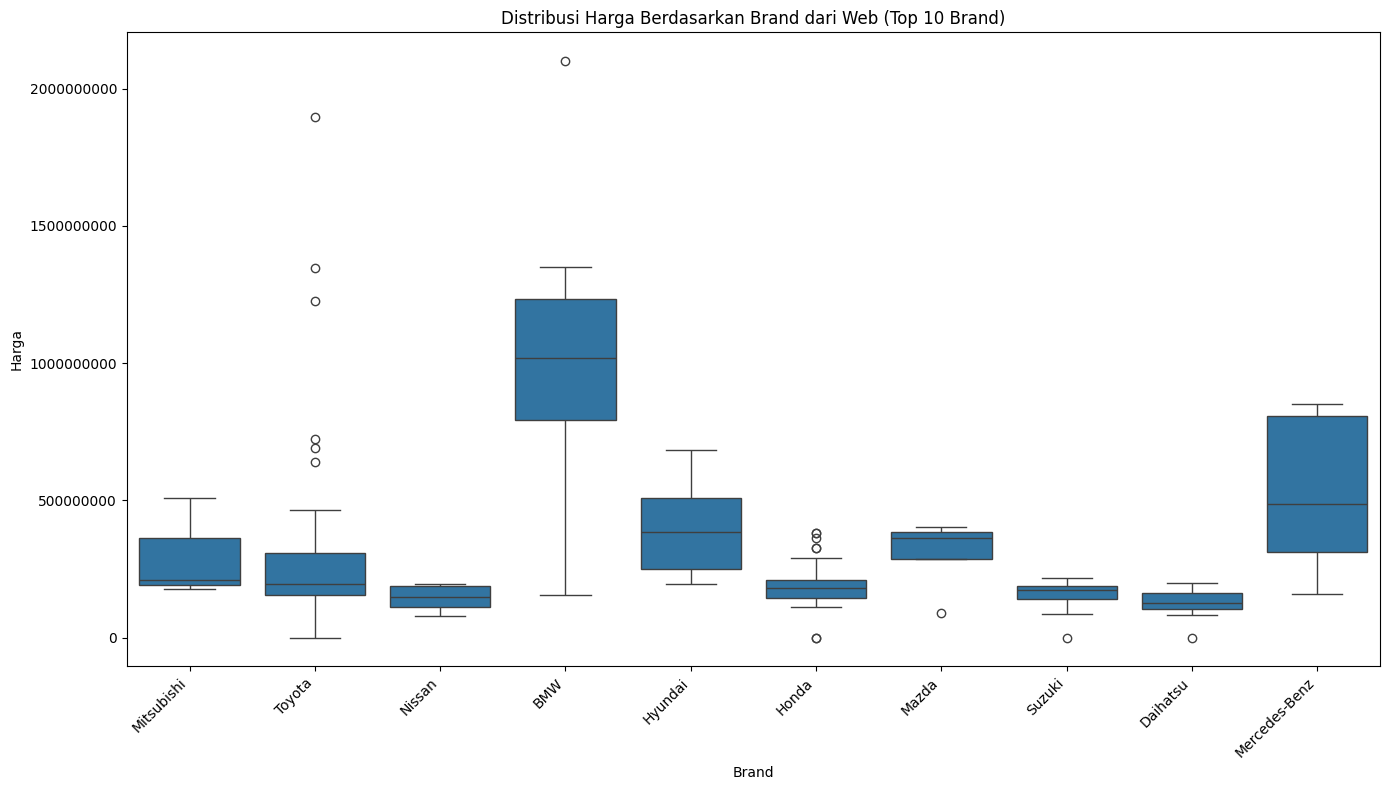

In [ ]:
top_brands = df_web['Brand'].value_counts().head(10).index
df_top_brands = df_web[df_web['Brand'].isin(top_brands)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Harga', data=df_top_brands)
plt.title('Distribusi Harga Berdasarkan Brand dari Web (Top 10 Brand)')
plt.xlabel('Brand')
plt.ylabel('Harga')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Dan untuk melihat apakah terdapat outlier harga pada setiap brand mobil kita memerlukan visualisasi boxplot karena dapat menampilkan rentang rata-rata dan juga outlier yang ada pada dataset. Jika kita lihat pada visualisasi diatas yang mana kita mengambil 10 brand teratas, lalu pada brand Toyota kita dapat melihat salah satu outlier dengan titik yang berada pada sekitaran harga 3M yang mana hal tersebut menandakan bahwa terdapat mobil dengan brand Toyota yang harganya tidak sesuai dengan rata-rata harga mobil bekas brand Toyota, jika kita cari pada datasetnya memang terdapat mobil bekas harga 3M dengan brand Toyota, yakni mobil bekas dengan model Land Cruiser

**DATA SET FROM KAGGLE**

In [ ]:
df_kaggle = pd.read_csv("/content/used_car_data_kaggle.csv")
df_kaggle.columns

Index(['id_ucd', 'id_merk', 'type', 'model', 'color', 'year',
       'id_transmission', 'id_fuel_type', 'door', 'cylinder_size',
       'cylinder_total', 'turbo', 'mileage', 'license_plate', 'price_cash',
       'price_credit', 'nilai_jual_pkb', 'pkb_pokok', 'stnk_date', 'levy_date',
       'swdkllj', 'total_levy', 'showroom_name', 'showroom_location',
       'showroom_regency', 'photo_1', 'photo_2', 'photo_3', 'link',
       'created_at', 'updated_at'],
      dtype='object')

**DATA INTEGRATION** FROM DATASET KAGGLE

In [ ]:
df_kaggle = df_kaggle.drop(columns=['photo_1', 'photo_2', 'photo_3', 'link', 'created_at', 'updated_at'])

In [ ]:
df_kaggle = df_kaggle.dropna()


In [ ]:
print(df_kaggle.to_string())

     id_ucd        id_merk                          type          model                color  year  id_transmission id_fuel_type  door  cylinder_size  cylinder_total  turbo  mileage license_plate  price_cash  price_credit  nilai_jual_pkb    pkb_pokok   stnk_date   levy_date      swdkllj  total_levy                    showroom_name                                                                                                                           showroom_location showroom_regency
1        44          Mazda                     3 5 HB 6E        MINIBUS        HITAM METALIK  2016                2     Gasoline     5           1998               4      0    55000    B 2713 BYI   340000000     360000000    2.730000e+08    5733000.0  10/22/2023  10/22/2023     143000.0   5876000.0                        GARAGE 88                                                                                           Jl.Radio 1 No.19, Kebayoran Baru, Jakarta Selatan  Jakarta Selatan
2       160         

**VISUALISASI & ANALISIS** FROM DATASET KAGGLE

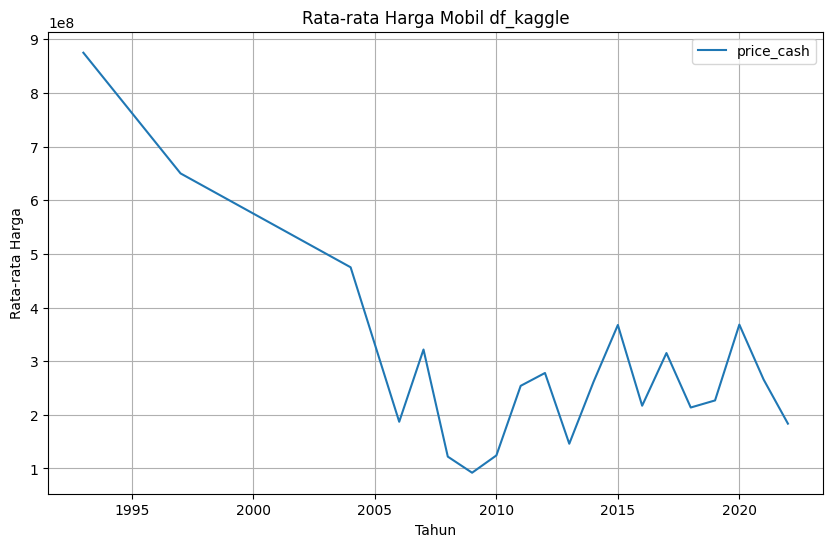

In [ ]:
df_annual_avg_price1 = df_kaggle.groupby('year')['price_cash'].mean().reset_index()

df_annual_avg_price1 = df_annual_avg_price1.sort_values(by='year')

df_annual_avg_price1.plot(x='year', y='price_cash', kind='line', figsize=(10, 6))
plt.title('Rata-rata Harga Mobil df_kaggle')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga')
plt.grid(True)
plt.show()

Seperti visualisasi rata-rata harga pada keluaran mobil bekas yang ada pada dataset sebelumnya yang kita scraping dari web, disini kita visulisasikan dataset yang kita ambil dari kaggle. Jika kita lihat, terdapat perbedaan yang signifikan yakni terdapat rata-rata harga mendekati 900 juta pada mobil keluaran tahun 1993. Dan jika kita lihat pada dataset kaggle, mobil tersebut adalah mobil dari brand mercedez-benz yakni 300GE

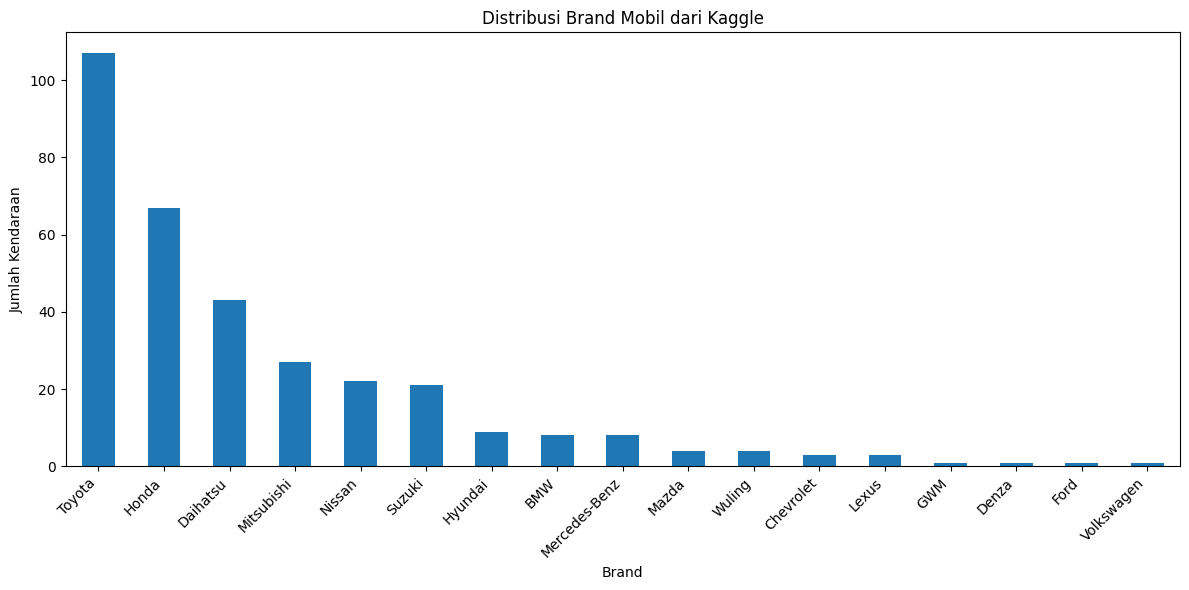

In [ ]:
brand_counts1 = df_kaggle['id_merk'].value_counts()

plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Distribusi Brand Mobil dari Kaggle')
plt.xlabel('Brand')
plt.ylabel('Jumlah Kendaraan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dan pada visualisasi distribusi Brand mobil pada dataset kaggle tidak jauh beda dari dataset yang kita scarping dari web, karena terdapat brand Toyota memliki kemunculan yang paling banyak dengan diikuti brand-brand yang hampir sama seperti sebelumnya

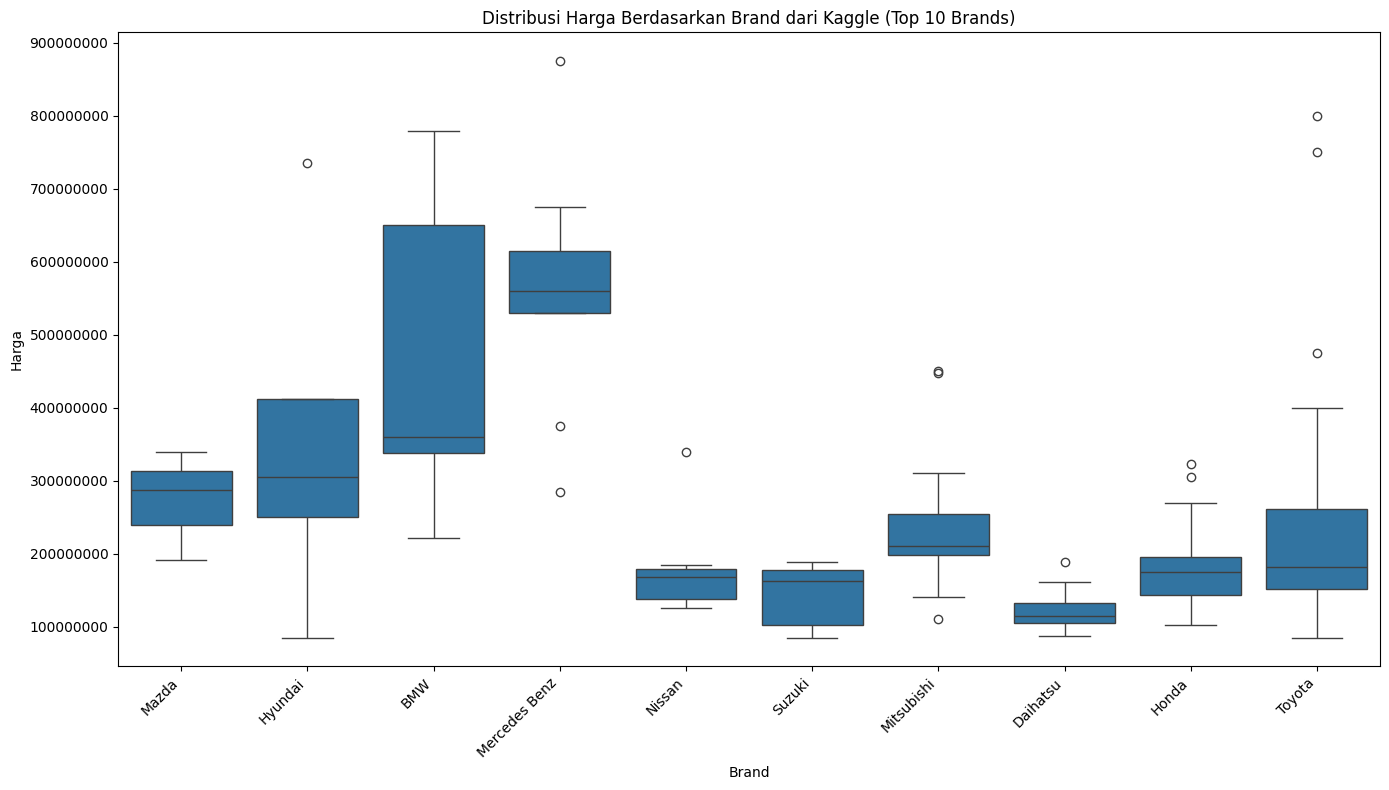

In [ ]:
top_brands = df_kaggle['id_merk'].value_counts().head(10).index
df_top_brands = df_kaggle[df_kaggle['id_merk'].isin(top_brands)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='id_merk', y='price_cash', data=df_top_brands)
plt.title('Distribusi Harga Berdasarkan Brand dari Kaggle (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Harga')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

Pada visualisasi boxplot diatas, tidak jauh berbeda dengan visulaisasi pada dataset web hanya saja pada visualisasi disini terdapat banyak brand yang memiliki rata-rata yang lebih tinggi dibandingkan yang ada pada dataset web.

**PRICE COMPARISON BETWEEN WEB SCRAP & KAGGLE**

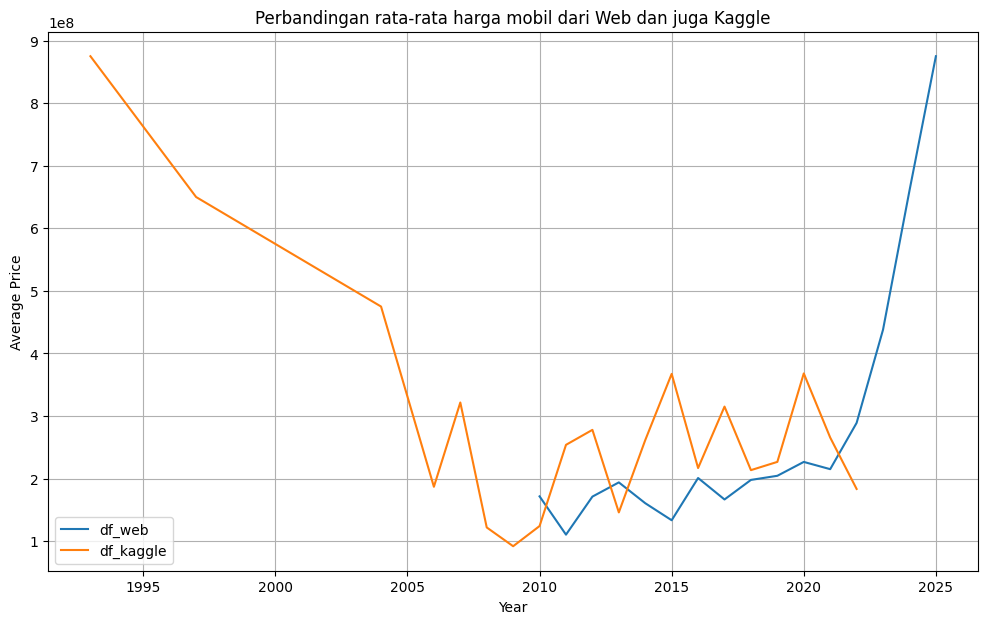

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(df_annual_avg_price['Tahun'], df_annual_avg_price['Harga'], label='df_web')
plt.plot(df_annual_avg_price1['year'], df_annual_avg_price1['price_cash'], label='df_kaggle')
plt.title('Perbandingan rata-rata harga mobil dari Web dan juga Kaggle')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan perbandingan visualisasi rata-rata harga antara dataset hasil scraping dan dataset Kaggle, terlihat bahwa pola kenaikan harga pada dataset scraping lebih konsisten sebelum mencapai mobil keluaran tahun 2025, di mana mobil dengan tahun keluaran lebih baru cenderung memiliki rata-rata harga lebih tinggi, sesuai kondisi pasar mobil bekas Indonesia. Sementara itu, dataset Kaggle menunjukkan adanya anomali pada tahun 1993 dengan rata-rata harga mendekati 900 juta. Nilai ekstrem tersebut berasal dari mobil Mercedes-Benz 300GE yang merupakan kendaraan premium dan langka yang mana masuk sebagai koleksi untuk para kolektor, sehingga wajar memiliki harga jauh di atas mobil lain pada tahun yang sama dan juga mobil keluaran tahun 2025 pada dataset web memliki rata-rata semakin tinggi seiringnya mobil dengan keluaran terbaru